In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('letter-recognition.data',header = None)

In [3]:
df.columns = ['lettr','x-box','y-box','width','high ','onpix','x-bar','y-bar','x2bar','y2bar',
              'xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']

In [4]:
df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
#check the shape of the data set (rows, columns)
df.shape

(20000, 17)

In [6]:
df.isnull().values.ravel().sum()

0

In [7]:
predictors = ['x-box','y-box','width','high ','onpix','x-bar','y-bar','x2bar','y2bar',
              'xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']

In [8]:
X = df[predictors]
y = df["lettr"]

## Visualizing data using Seaborn

**Seaborn :** Python library for statistical visualization library built on top of Matplotlib 

- Anaconda users run *conda install seaborn* from the command line

In [22]:
#Conventional way to import Swaborn

import seaborn as sns

#allow plots to appear within notebook
%matplotlib inline

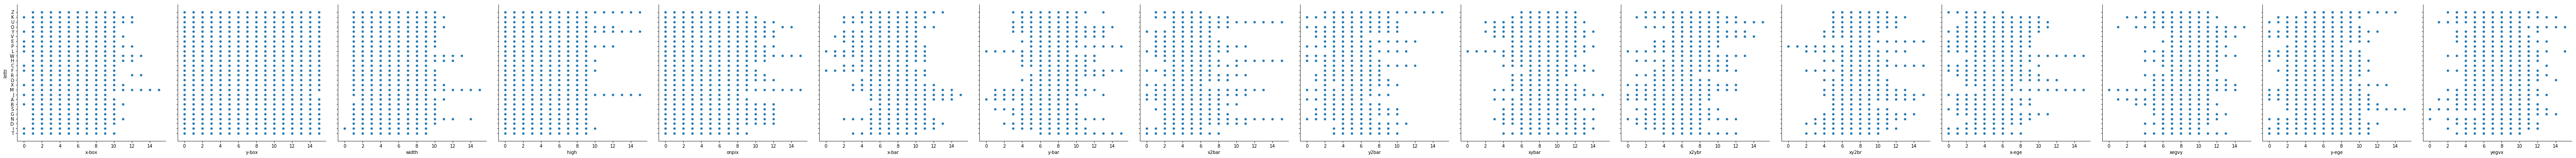

In [10]:
#visualise the relationship between the features and the response using scatter plot

sns.pairplot(df, x_vars =predictors, y_vars = 'lettr',height = 5)

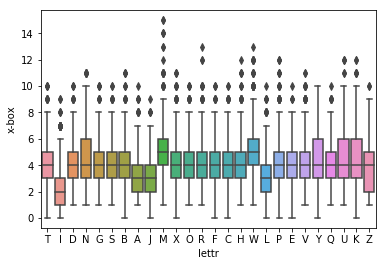

In [23]:
ax = sns.boxplot(x='lettr', y='x-box', data=df)

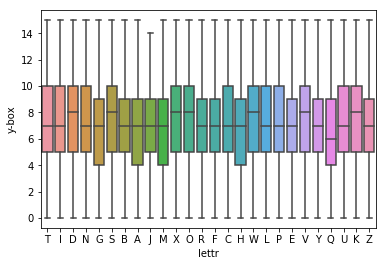

In [24]:
ax = sns.boxplot(x='lettr', y='y-box', data=df)

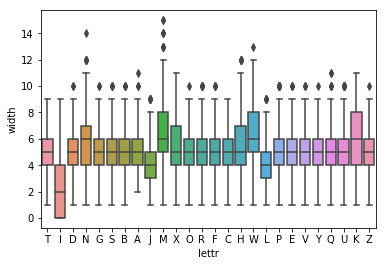

In [25]:
ax = sns.boxplot(x='lettr', y='width', data=df)

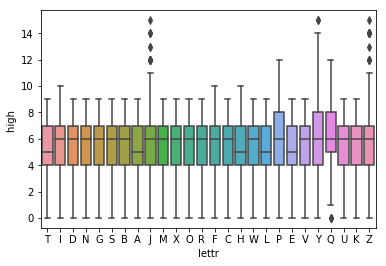

In [30]:
ax = sns.boxplot(x='lettr', y='high ', data=df)

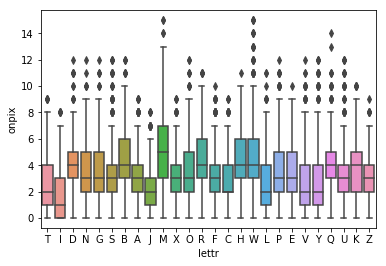

In [31]:
ax = sns.boxplot(x='lettr', y='onpix', data=df)

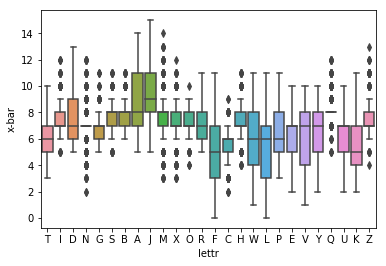

In [32]:
ax = sns.boxplot(x='lettr', y='x-bar', data=df)

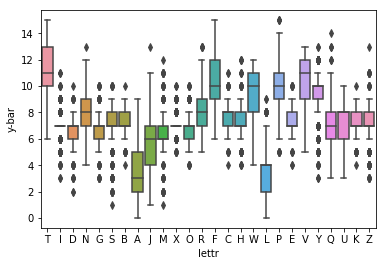

In [33]:
ax = sns.boxplot(x='lettr', y='y-bar', data=df)

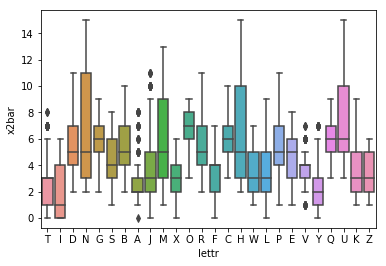

In [34]:
ax = sns.boxplot(x='lettr', y='x2bar', data=df)

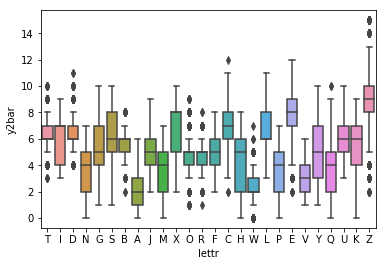

In [35]:
ax = sns.boxplot(x='lettr', y='y2bar', data=df)

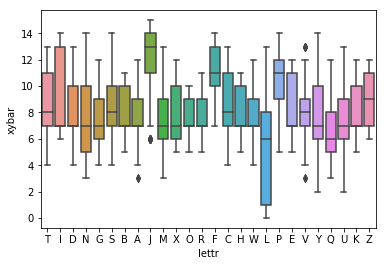

In [36]:
ax = sns.boxplot(x='lettr', y='xybar', data=df)

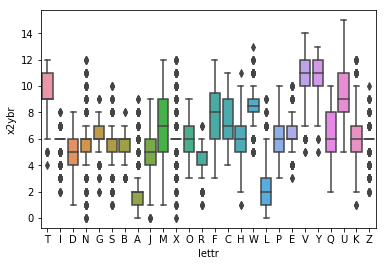

In [37]:
ax = sns.boxplot(x='lettr', y='x2ybr', data=df)

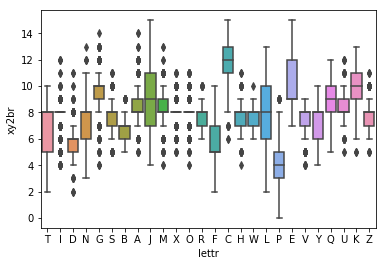

In [38]:
ax = sns.boxplot(x='lettr', y='xy2br', data=df)

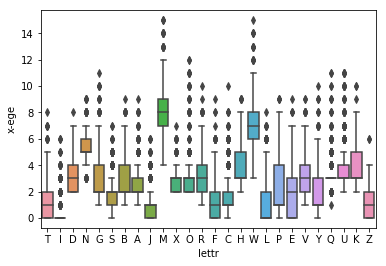

In [39]:
ax = sns.boxplot(x='lettr', y='x-ege', data=df)

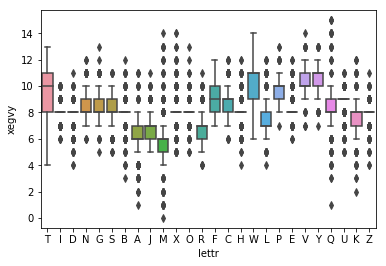

In [40]:
ax = sns.boxplot(x='lettr', y='xegvy', data=df)

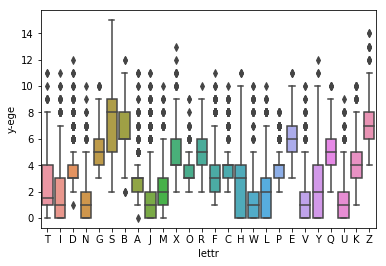

In [41]:
ax = sns.boxplot(x='lettr', y='y-ege', data=df)

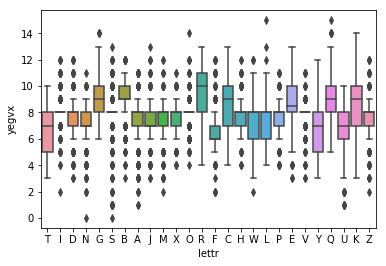

In [42]:
ax = sns.boxplot(x='lettr', y='yegvx', data=df)

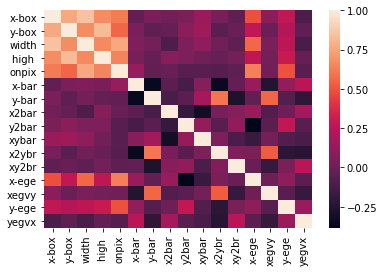

In [11]:
sns.heatmap(df.corr())

## Splitting X and y in training and testing sets

In [43]:
from sklearn.model_selection import train_test_split
X_train,  X_test,y_train, y_test = train_test_split(X,y, random_state = 1)

In [13]:
# default split is 75% to 25%
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (15000, 16)
y_train shape: (15000,)
X_test shape: (5000, 16)
y_test shape: (5000,)


In [14]:
# training a decision tree classifier on training dataset

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
# make class prediction for the testing data set
y_pred_class = dtree.predict(X_test)


In [16]:
#calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.8702


**Null accuracy:** Accuracy that could be achieved by predicting the most fequent class 

In [17]:
y_test.value_counts()/len(y_test)

O    0.0436
P    0.0430
T    0.0430
S    0.0424
U    0.0416
X    0.0406
A    0.0404
B    0.0400
N    0.0400
Y    0.0400
D    0.0394
Z    0.0390
R    0.0386
W    0.0386
Q    0.0380
G    0.0376
M    0.0376
V    0.0366
C    0.0364
H    0.0362
E    0.0356
F    0.0354
J    0.0348
L    0.0348
I    0.0340
K    0.0328
Name: lettr, dtype: float64

## Confusion Matrix 

Table that describes performance of the model

In [18]:
#IMPORTANT: first argument is true value, second argument is predicted values

metrics.confusion_matrix(y_test,y_pred_class)

array([[189,   1,   1,   0,   0,   0,   2,   0,   0,   1,   0,   0,   1,
          0,   2,   1,   2,   0,   1,   0,   0,   0,   0,   1,   0,   0],
       [  0, 171,   0,   1,   0,   0,   2,   1,   2,   0,   0,   0,   0,
          0,   5,   0,   3,   5,   6,   1,   0,   3,   0,   0,   0,   0],
       [  0,   0, 158,   1,   5,   2,   4,   0,   0,   1,   0,   1,   0,
          0,   5,   1,   0,   0,   2,   2,   0,   0,   0,   0,   0,   0],
       [  0,   5,   0, 173,   0,   1,   0,   4,   0,   1,   1,   1,   1,
          1,   3,   1,   1,   1,   0,   0,   0,   1,   0,   2,   0,   0],
       [  0,   0,   3,   0, 160,   1,   5,   0,   0,   1,   0,   1,   0,
          0,   0,   0,   0,   2,   1,   2,   0,   0,   0,   1,   0,   1],
       [  1,   0,   0,   1,   0, 149,   1,   2,   1,   1,   0,   0,   0,
          0,   0,   8,   1,   0,   1,   1,   0,   4,   0,   3,   3,   0],
       [  0,   2,   2,   2,   4,   0, 155,   1,   2,   0,   0,   0,   1,
          0,   7,   2,   3,   1,   4,   1,   

In [19]:
conf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_class), columns=["a","b","c","d","e","f","g","h","i","j",
                                                                                  "k","l","m","n", "o", "p" ,"q", "r", "s", "t",
                                                                                   "u","v","w", "x", "y", "z"])

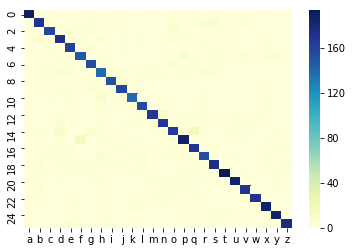

In [20]:
# plot using a color palette
sns.heatmap(conf_matrix, cmap="YlGnBu")


In [21]:
# calculate a cross-validated accuracy
from sklearn.cross_validation import cross_val_score

cross_val_score(dtree, X,y,cv = 10, scoring = "accuracy").mean()

0.8835922057980797

### Desicion tree is 88% accurate which is good as compared to the null accuracy of 4%

Let's work on parameter tunning for decision trees

#### max_depth
The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 32 and check the accuracy scores

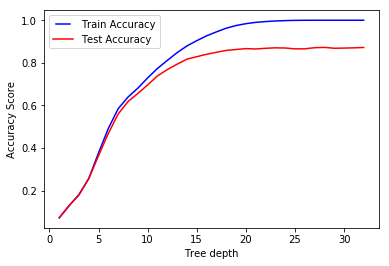

In [22]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    acc = metrics.accuracy_score(y_train, train_pred)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    #roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(acc)
    y_pred = dt.predict(X_test)
    test_pred = dt.predict(X_test)
    acc = metrics.accuracy_score(y_test, test_pred)
    # Add auc score to previous test results
    test_results.append(acc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy Score")
plt.xlabel('Tree depth')
plt.show()

#### min_samples_split
min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 1% to 10% of the samples

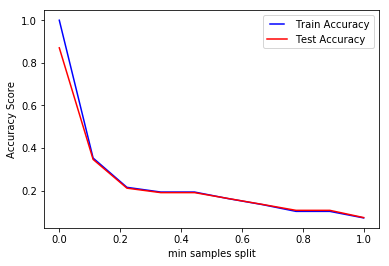

In [23]:
min_samples_splits = np.linspace(0.0001, 1.0, 10, endpoint=True)

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    acc = metrics.accuracy_score(y_train, train_pred)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    #roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(acc)
    y_pred = dt.predict(X_test)
    test_pred = dt.predict(X_test)
    acc = metrics.accuracy_score(y_test, test_pred)
    # Add auc score to previous test results
    test_results.append(acc)
    
    
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy Score")
plt.xlabel("min samples split")
plt.show()

#### min_samples_leaf
min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

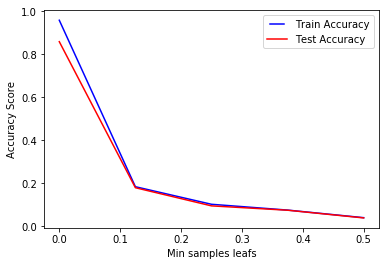

In [24]:
min_samples_leafs = np.linspace(0.0001, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    acc = metrics.accuracy_score(y_train, train_pred)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    #roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(acc)
    y_pred = dt.predict(X_test)
    test_pred = dt.predict(X_test)
    acc = metrics.accuracy_score(y_test, test_pred)
    # Add auc score to previous test results
    test_results.append(acc)
    
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy Score")
plt.xlabel("Min samples leafs")
plt.show()


#### max_features
max_features represents the number of features to consider when looking for the best split.

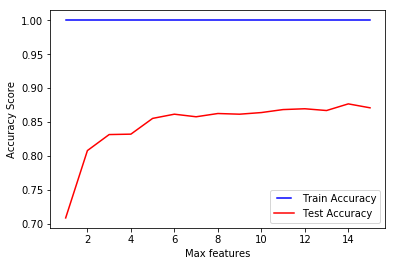

In [25]:


max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    acc = metrics.accuracy_score(y_train, train_pred)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    #roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(acc)
    y_pred = dt.predict(X_test)
    test_pred = dt.predict(X_test)
    acc = metrics.accuracy_score(y_test, test_pred)
    # Add auc score to previous test results
    test_results.append(acc)
    
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(max_features, test_results, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy Score")
plt.xlabel("Max features")
plt.show()

#### Tune all parameters together 

find the best combinations of parameters 

In [26]:
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [105]:
#define the paraeters that should be searched

max_features = [ 12,  14, 16]
#min_samples_leafs = [1,2,3]
min_samples_splits = [2,3,4]
max_depths = [34,35, 36,37]

In [106]:
param_grid = dict(max_features = max_features,
                  min_samples_leaf = min_samples_leafs, 
                  min_samples_split = min_samples_splits,
                 max_depth = max_depths )

In [107]:
print(param_grid)

{'max_features': [12, 14, 16], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4], 'max_depth': [34, 35, 36, 37]}


In [108]:
dtree=DecisionTreeClassifier()

In [109]:
grid = GridSearchCV(dtree, param_grid, cv = 10, scoring = 'accuracy', n_jobs=-1)

In [110]:
#fit the grid with data
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [12, 14, 16], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4], 'max_depth': [34, 35, 36, 37]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [111]:
grid.grid_scores_

[mean: 0.87525, std: 0.00969, params: {'max_depth': 34, 'max_features': 12, 'min_samples_leaf': 1, 'min_samples_split': 2},
 mean: 0.87540, std: 0.01099, params: {'max_depth': 34, 'max_features': 12, 'min_samples_leaf': 1, 'min_samples_split': 3},
 mean: 0.87380, std: 0.01140, params: {'max_depth': 34, 'max_features': 12, 'min_samples_leaf': 1, 'min_samples_split': 4},
 mean: 0.86825, std: 0.00802, params: {'max_depth': 34, 'max_features': 12, 'min_samples_leaf': 2, 'min_samples_split': 2},
 mean: 0.86490, std: 0.00843, params: {'max_depth': 34, 'max_features': 12, 'min_samples_leaf': 2, 'min_samples_split': 3},
 mean: 0.86605, std: 0.00790, params: {'max_depth': 34, 'max_features': 12, 'min_samples_leaf': 2, 'min_samples_split': 4},
 mean: 0.86220, std: 0.01095, params: {'max_depth': 34, 'max_features': 12, 'min_samples_leaf': 3, 'min_samples_split': 2},
 mean: 0.85945, std: 0.01112, params: {'max_depth': 34, 'max_features': 12, 'min_samples_leaf': 3, 'min_samples_split': 3},
 mean: 0

In [112]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=35,
            max_features=16, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [113]:
grid.best_score_

0.88555

## Lets try K Nearest Neighbours 

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [16]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn,X,y,cv = 10, scoring='accuracy')

In [17]:
print(scores)

[0.95976155 0.95477137 0.95920398 0.95359281 0.96251874 0.94544545
 0.95636911 0.95983936 0.95022624 0.95168596]


In [18]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
print(scores.mean())

0.9553414570068091


In [20]:
# search for optimal value of k for knn
k_range = range(1,32)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn,X,y,cv = 10, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)

[0.959952534107979, 0.946909276835739, 0.9555502549647394, 0.9531973877899942, 0.9553414570068091, 0.9528965829448669, 0.9526989366345269, 0.9513490841469687, 0.9504472927530465, 0.9484556438295074, 0.947547389907761, 0.9464481293696221, 0.9453451388232408, 0.9442002450061763, 0.9432049840266441, 0.9422032862175813, 0.9402024847283459, 0.9386495597612109, 0.9376975773992771, 0.9357483376597315, 0.9352485300649048, 0.9335005942351984, 0.9325950540605603, 0.9309966925317104, 0.9292498694561235, 0.9275979546996164, 0.9265502831210904, 0.9256966589569322, 0.9242471638217868, 0.9226000486633363, 0.9216505832282836]


Text(0,0.5,'Cross-Validated Accuracy')

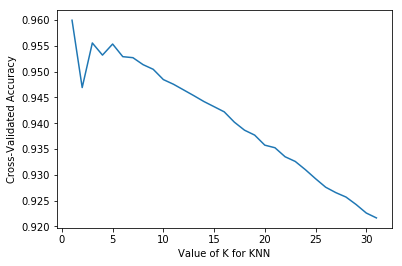

In [21]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Support Vector Machines

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [45]:
svc = SVC()
svc.fit(X_train,y_train)
# make class prediction for the testing data set
y_pred_class = svc.predict(X_test)

#calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.9694


In [46]:
#IMPORTANT: first argument is true value, second argument is predicted values

metrics.confusion_matrix(y_test,y_pred_class)

array([[201,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   2,   0,   0],
       [  0,   0, 181,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0, 192,   0,   0,   1,   1,   0,   0,   0,   0,   0,
          0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0, 173,   0,   1,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   2, 170,   0,   0,   1,   0,   0,   0,   0,
          0,   0,   3,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   1,   0,   0, 182,   0,   0,   0,   0,   0,   1,
          0,   1,   0,   0,   0,   0,   0,   

In [47]:
conf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_class), columns=["a","b","c","d","e","f","g","h","i","j",
                                                                                  "k","l","m","n", "o", "p" ,"q", "r", "s", "t",
                                                                                   "u","v","w", "x", "y", "z"],
                          index = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n", "o", "p" ,"q", "r", "s", "t","u",
                                   "v","w", "x", "y", "z"])

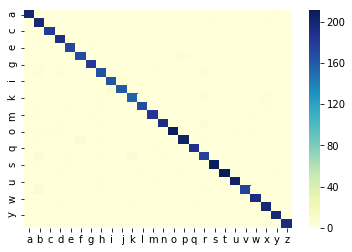

In [48]:
# plot using a color palette
sns.heatmap(conf_matrix, cmap="YlGnBu")

In [50]:
cross_val_score(svc, X,y,cv = 10, scoring = "accuracy").mean()

0.974798079706216

In [51]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
c_range = [0.5,1.,2.]
kernel_options = ['rbf','poly','linear']

param_grid = dict(C = c_range,
                  kernel = kernel_options )

In [54]:
svc = SVC()

grid = GridSearchCV(svc, param_grid, cv = 10, scoring = 'accuracy', n_jobs=-1)

In [55]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.5, 1.0, 2.0], 'kernel': ['rbf', 'poly', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)